In [1]:
import pandas as pd
from pandas import read_csv
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
Sensors = pd.read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa1_timeline.csv",
                     sep = ",")
Sensors.set_index("channel", inplace = True)
Sensors = Sensors.applymap(lambda x: x.replace("*", ""))

df = read_csv("c:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/StChiara.csv",
             sep = ",",
             parse_dates = ["ts"])
df.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
df = df.rename(columns=change)


In [2]:
Test = {}
maxim = len(Sensors.columns)
for i,col in enumerate(Sensors.columns):
    materials = []
    if i == maxim-1:
        for j,material in enumerate(Sensors[col]):
            f = materials.count(material)+1            
            materials.append(material)
            if list(Test.keys()).count(material + str(f)) == 1:
                Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                     df[col:][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })])
            else:
                Test[material + str(f)] = df[col:][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })    
    else:
        for j,material in enumerate(Sensors[col]):
            f = materials.count(material)+1            
            materials.append(material)
            if list(Test.keys()).count(material + str(f)) == 1:
                Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                     df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })
                                                    ])
            else:
                Test[material + str(f)] = df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })


In [3]:
Test

{'ZnOR1':                                      R    HT     V
 ts                                                
 2021-01-13 08:46:00+00:00  128000000.0  52.1  0.33
 2021-01-13 08:47:00+00:00  128000000.0  51.9  0.33
 2021-01-13 08:48:00+00:00  128000000.0  51.4  0.33
 2021-01-13 08:49:00+00:00  128000000.0  52.3  0.34
 2021-01-13 08:50:00+00:00  128000000.0  52.3  0.34
 ...                                ...   ...   ...
 2023-06-26 09:07:00+00:00     173762.0  68.7  1.99
 2023-06-26 09:08:00+00:00     173517.0  68.6  1.99
 2023-06-26 09:09:00+00:00     173367.0  68.6  1.99
 2023-06-26 09:10:00+00:00     173423.0  68.6  1.99
 2023-06-26 09:11:00+00:00     173254.0  68.5  1.99
 
 [1187395 rows x 3 columns],
 'ZnOR2':                                      R    HT     V
 ts                                                
 2021-01-13 08:46:00+00:00  128000000.0  51.2  0.33
 2021-01-13 08:47:00+00:00  128000000.0  51.0  0.33
 2021-01-13 08:48:00+00:00  128000000.0  51.0  0.33
 2021-01-13 08:

In [4]:
import matplotlib.pyplot as plt

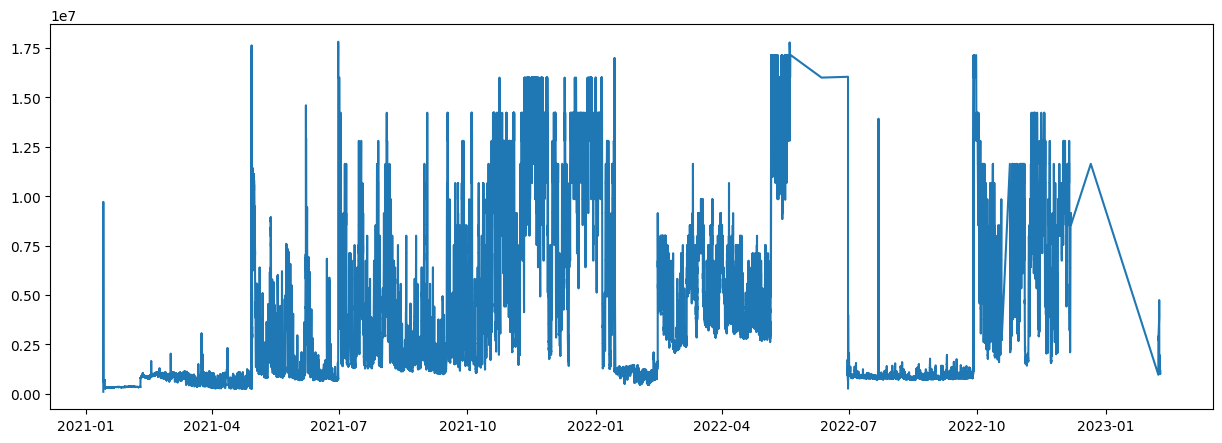

In [5]:
df1 = Test["LaFeO31"]

df1 = df1.loc[df1.R < 0.18e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df1.index, df1.R)
plt.show()

# Sensore 2

[]

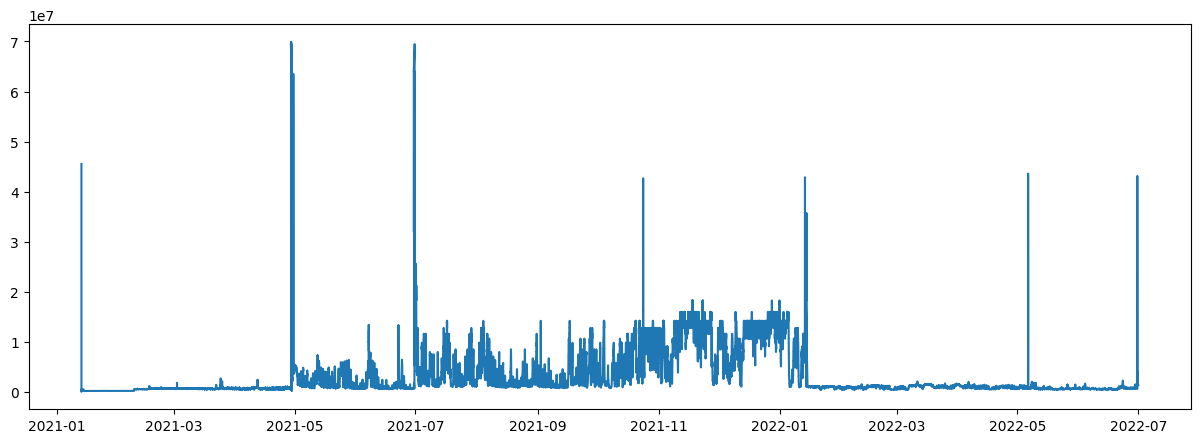

In [6]:
df2 = Test["LaFeO32"]

df2 = df2.loc[df2.R < 0.7e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df2.index, df2.R)
plt.plot()

# Sensore 3

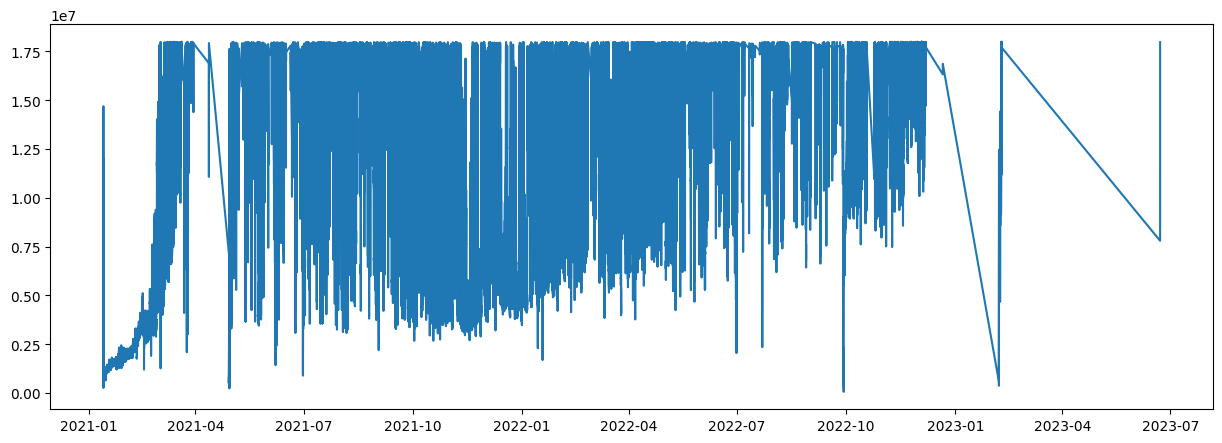

In [7]:
df3 = Test["WO31"]
""" Maybe very bad sensor??? Always saturating or breaking??? """
df3 = df3.loc[df3.R < 0.18e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df3.index, df3.R)
plt.show()

# Sensore 4

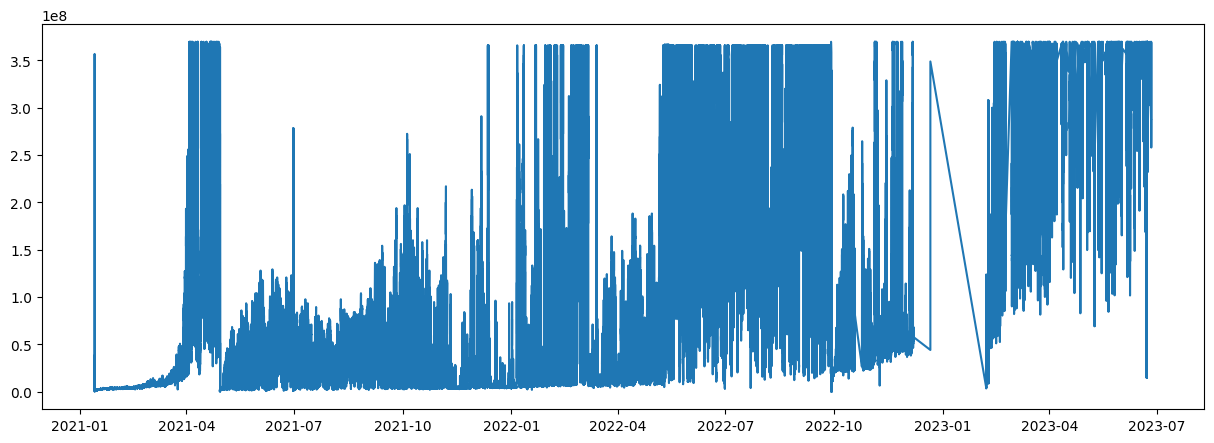

In [8]:
df4 = Test["WO32"]
df4 = df4.loc[df4.R < 3.7e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df4.index, df4.R)
plt.show()

# Sensore 5

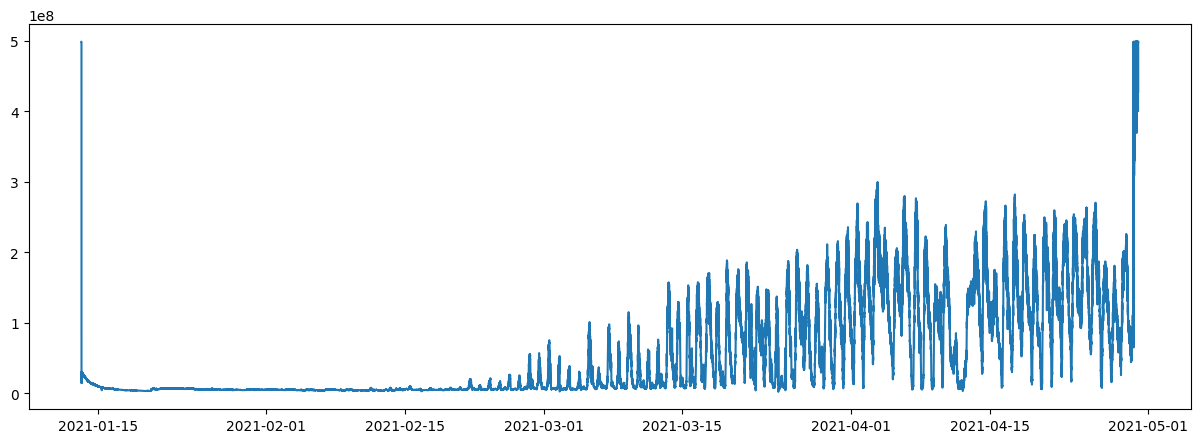

In [9]:
df5 = Test["ZnO1"]
"Bad sensor?? Saturation always occurs after half 03/2021"
# df5 = df5.loc[df5.R < 3.7e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df5.index, df5.R)
plt.show()

# Sensore 6

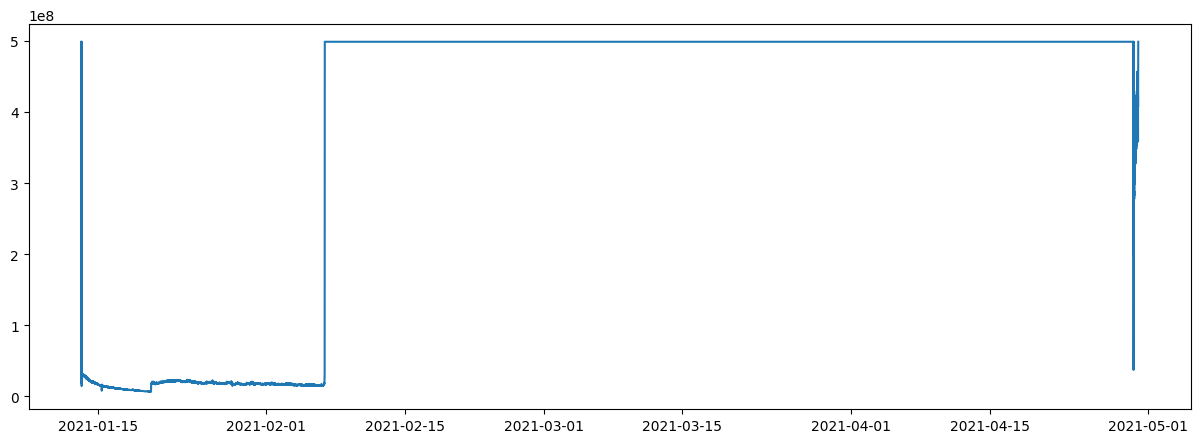

In [10]:
df6 = Test["ZnO2"]

"""Reaches saturation after 06/2021"""
# Pulisco le saturazioni o altri errori causati dal sensore : 
# df6 = df6.loc[df6.R < 2.8e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df6.index, df6.R)
plt.show()

# Sensore 7

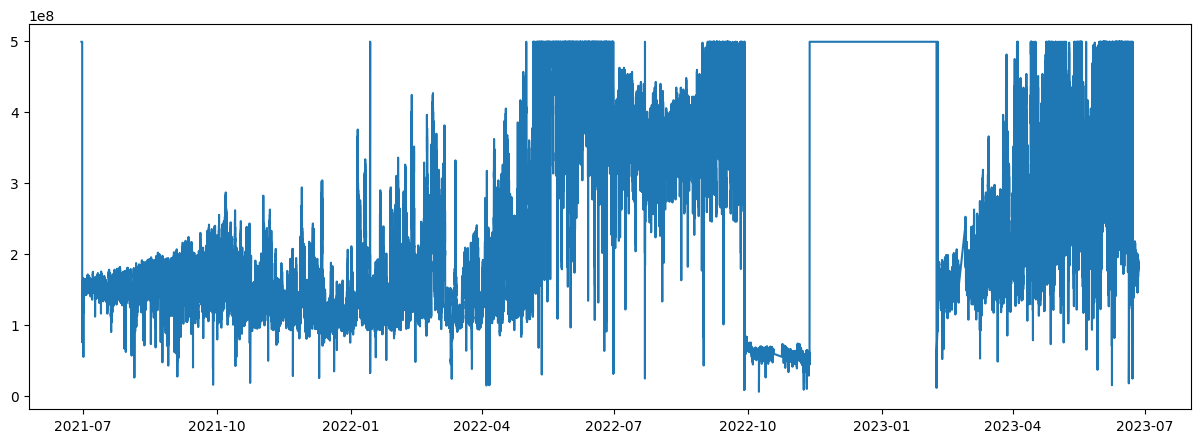

In [11]:
df7 = Test["STN1"]

""" Surely a very bad sensor, saturated during almost for all the time"""
# Pulisco le saturazioni o altri errori causati dal sensore : 
# df7 = df7.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df7.index, df7.R)
plt.show()

# Sensore 8

In [12]:
df8 = Test["STN2"]

""" Also a very bad sensor, always saturated after 04/2021 """
# Pulisco le saturazioni o altri errori causati dal sensore : 
# df8 = df8.loc[df9.R < 2.8e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df8.index, df8.R)
plt.show()

KeyError: 'STN2'

# Sensore 9

In [ ]:
df9 = Test["ZnOg1"]

""" Very Bad one, almost no good data"""
# Pulisco le saturazioni o altri errori causati dal sensore : 
# df9 = df9.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df9.index, df9.R)
plt.show()

# Sensore 10
Heater rotto, solo una parte funzionante

In [ ]:
df10 = Test["ZnOg2"]


# Pulisco le saturazioni o altri errori causati dal sensore : 
df10 = df10.loc[df10.HT < 165]
fig = plt.figure(figsize=(15,5))
plt.plot(df10.index, df10.HT)
plt.show()

In [ ]:
df11 = Test["ZnOR1"]

# Pulisco le saturazioni o altri errori causati dal sensore : 
df11 = df11.loc[df11.HT < 300]
fig = plt.figure(figsize=(15,5))
plt.plot(df11.index, df11.HT)
plt.show()

In [ ]:
df12 = Test["CNT1"]

# Pulisco le saturazioni o altri errori causati dal sensore : 
df12 = df12.loc[df12.HT < 1000]
fig = plt.figure(figsize=(20,5))
plt.plot(df12.index, df12.HT)
plt.show()

In [ ]:
df13 = Test["SmFeO31"]

# Pulisco le saturazioni o altri errori causati dal sensore : 
df13 = df13.loc[df13.HT > 95]
fig = plt.figure(figsize=(20,5))
plt.plot(df13.index, df13.HT)
plt.show()

In [ ]:
df14 = Test['SmFeO32']

# Pulisco le saturazioni o altri errori causati dal sensore : 
df14 = df14.loc[df14.HT > 95]
fig = plt.figure(figsize=(20,5))
plt.plot(df14.index, df14.HT)
plt.show()


# Gap 1 14-01-2022 to 23-02-2022

In [ ]:
# df1 = Test["LaFeO31"]

# df1 = df1.loc[df1.R < 0.18e8]
# fig = plt.figure(figsize=(15,5))

# df_slice1 = df1["2022-01-14" : "2022-02-23"]
# plt.plot(df_slice1.index, df_slice1.R)
# plt.show()


df1 = Test["LaFeO31"]

df1 = df1.loc[df1.R < 0.18e8]
fig = plt.figure(figsize=(15,5))


start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]

for single_date in daterange(start_date, end_date):
    try:
        df_slice1 = df1[single_date.strftime("%Y-%m-%d"):]
        type(df_slice1.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice1 = df1[:]
plt.plot(df_slice1.index, df_slice1.R)
plt.show()
print(len(date_tot))

In [ ]:
# df2 = Test["LaFeO32"]

# df2 = df2.loc[df2.R < 0.7e8]
# fig = plt.figure(figsize=(15,5))

# df_slice2=df2["2022-01-14":"2022-03-23"]
# plt.plot(df_slice2.index, df_slice2.R)
# plt.plot()

df2 = Test["LaFeO32"]

df2 = df2.loc[df2.R < 0.7e8]
fig = plt.figure(figsize=(15,5))


start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]


for single_date in daterange(start_date, end_date):
    try:
        df_slice2 = df2[single_date.strftime("%Y-%m-%d"):]
        type(df_slice2.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice2 = df2[:]
plt.plot(df_slice2.index, df_slice2.R)
plt.show()
print(len(date_tot))

GAP 3-4

In [ ]:
# df3 = Test["WO31"]

# df3 = df3.loc[df3.R < 0.18e8]
# fig = plt.figure(figsize=(15,5))
# print(df3)
# df_slice3 = df3["2022-01-14":]
# plt.plot(df_slice3.index, df_slice3.R)
# plt.show()

df3 = Test["WO31"]

df3 = df3.loc[df3.R < 0.18e8]
fig = plt.figure(figsize=(15,5))

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
for single_date in daterange(start_date, end_date):
    try:
        df_slice3 = df3[single_date.strftime("%Y-%m-%d"):]
        type(df_slice3.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice3 = df3["":]
plt.plot(df_slice3.index, df_slice3.R)
plt.show()
print(len(date_tot))

In [ ]:
# df4 = Test["WO32"]

# df4 = df4.loc[df4.R < 3.7e8]
# fig = plt.figure(figsize=(15,5))
# print(df4)
# df_slice4 = df4[:]
# plt.plot(df_slice4.index, df_slice4.R)
# plt.show()


df4 = Test["WO32"]

df4 = df4.loc[df4.R < 3.7e8]
fig = plt.figure(figsize=(15,5))



start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
for single_date in daterange(start_date, end_date):
    try:
        df_slice4 = df4[single_date.strftime("%Y-%m-%d"):]
        type(df_slice4.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice4 = df4["2021-02-22":"2022-03-07"]
plt.plot(df_slice4.index, df_slice4.R)
plt.show()
print(len(date_tot))

GAP 5-6

In [ ]:
# df5 = Test["ZnO1"]

# df5 = df5.loc[df5.R < 3.7e8]
# fig = plt.figure(figsize=(15,5))
# print(df5)
# df_slice5 = df5[:]
# plt.plot(df_slice5.index, df_slice5.R)
# plt.show()

df5 = Test["ZnO1"]

df5 = df5.loc[df5.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]

for single_date in daterange(start_date, end_date):
    try:
        df_slice5 = df5[single_date.strftime("%Y-%m-%d"):]
        type(df_slice5.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice5 = df5[:]
plt.plot(df_slice5.index, df_slice5.R)
plt.show()
print(len(date_tot))

In [ ]:
# df6 = Test["ZnO2"]

# df6 = df6.loc[df6.R < 3.7e8]
# fig = plt.figure(figsize=(15,5))
# print(df6)
# df_slice6 = df6[:]
# plt.plot(df_slice6.index, df_slice6.R)
# plt.show()


df6 = Test["ZnO2"]

df6 = df6.loc[df6.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]

for single_date in daterange(start_date, end_date):
    try:
        df_slice11 = df11[single_date.strftime("%Y-%m-%d"):]
        type(df_slice11.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice6 = df6[:]
plt.plot(df_slice6.index, df_slice6.R)
plt.show()
print(len(date_tot))

GAP 7-8

In [ ]:
# df7 = Test["STN1"]

# df7 = df7.loc[df7.R < 2.8e8]
# fig = plt.figure(figsize=(15,5))
# print(df7)
# df_slice7 = df7[:]
# plt.plot(df_slice7.index, df_slice7.R)
# plt.show()



df7 = Test["STN1"]

df7 = df7.loc[df7.R < 2.8e8]
fig = plt.figure(figsize=(15,5))


start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]

for single_date in daterange(start_date, end_date):
    try:
        df_slice7 = df7[single_date.strftime("%Y-%m-%d"):]
        type(df_slice7.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice7 = df7[:]
plt.plot(df_slice7.index, df_slice7.R)
plt.show()
print(len(date_tot))

In [ ]:
df8 = Test["STN2"]

df8 = df8.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]

for single_date in daterange(start_date, end_date):
    try:
        df_slice8 = df8[single_date.strftime("%Y-%m-%d"):]
        type(df_slice8.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice8 = df8["2022-04-01":"2022-06-13"]
plt.plot(df_slice8.index, df_slice8.R)
plt.show()
print(len(date_tot))

In [ ]:
df9 = Test["ZnOg1"]

df9 = df9 .loc[df9.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]

for single_date in daterange(start_date, end_date):
    try:
        df_slice9 = df9[single_date.strftime("%Y-%m-%d"):]
        type(df_slice9.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice9 = df9[:]
plt.plot(df_slice9.index, df_slice9.R)
plt.show()
print(len(date_tot))

In [ ]:
df10 = Test["ZnOg2"]

df10 = df10.loc[df10.HT < 165]
fig = plt.figure(figsize=(15,5))


start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]


for single_date in daterange(start_date, end_date):
    try:
        df_slice10 = df10[single_date.strftime("%Y-%m-%d"):]
        type(df_slice10.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice10 = df10[:]
plt.plot(df_slice10.index, df_slice10.R)
plt.show()
print(len(date_tot))

In [ ]:
df11 = Test["ZnOR1"]

df11 = df11.loc[df11.HT < 300]
fig = plt.figure(figsize=(15,5))


start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]

for single_date in daterange(start_date, end_date):
    try:
        df_slice11 = df11[single_date.strftime("%Y-%m-%d"):]
        type(df_slice11.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice11 = df11[:]
plt.plot(df_slice11.index, df_slice11.R)
plt.show()
print(len(date_tot))

In [ ]:
# df12 = Test["CNT1"]

# df12 = df12.loc[df12.HT < 1000]
# fig = plt.figure(figsize=(15,5))


# start_date=date(2021,1,1)
# end_date=date(2023,6,15)
# date_tot=[]

# for single_date in daterange(start_date, end_date):
#     try:
#         df_slice12 = df12[single_date.strftime("%Y-%m-%d"):]
#         type(df_slice12.index)
#     except:
#         print(single_date)
#         date_tot.append(single_date)

# df_slice12 = df12[:]
# plt.plot(df_slice12.index, df_slice12.R)
# plt.show()
# print(len(date_tot))


df12 = Test["CNT1"]

df12 = df12.loc[df12.HT < 1000]
fig = plt.figure(figsize=(15,5))


start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]

for single_date in daterange(start_date, end_date):
    try:
        df_slice12 = df12[single_date.strftime("%Y-%m-%d"):]
        type(df_slice12.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice12 = df12[:]
plt.plot(df_slice12.index, df_slice12.R)
plt.show()
print(len(date_tot))

In [ ]:
df14 = Test["SmFeO32"]

df14 = df14.loc[df14.HT > 95]
fig = plt.figure(figsize=(15,5))

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]

for single_date in daterange(start_date, end_date):
    try:
        df_slice14 = df14[single_date.strftime("%Y-%m-%d"):]
        type(df_slice14.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice14 = df14["2022-12-10":"2022-12-20"]
plt.plot(df_slice14.index, df_slice14.R)
plt.show()
print(len(date_tot))

In [ ]:
df13 = Test["SmFeO31"]

df13 = df13.loc[df13.HT > 95]
fig = plt.figure(figsize=(15,5))

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]

for single_date in daterange(start_date, end_date):
    try:
        df_slice13 = df13[single_date.strftime("%Y-%m-%d"):]
        type(df_slice13.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice13 = df13[:]
plt.plot(df_slice13.index, df_slice13.R)
plt.show()
print(len(date_tot))